In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


Columns in dataset: Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time',
       'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out'],
      dtype='object')
Training Accuracy: 0.8959537572254336
Testing Accuracy: 0.8538461538461538


/var/folders/wq/_08fpqds6_3_sjw2yndvs_6w0000gn/T/ipykernel_5881/2171900047.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Family_Support'] = label_encoder.fit_transform(X['Family_Support'])


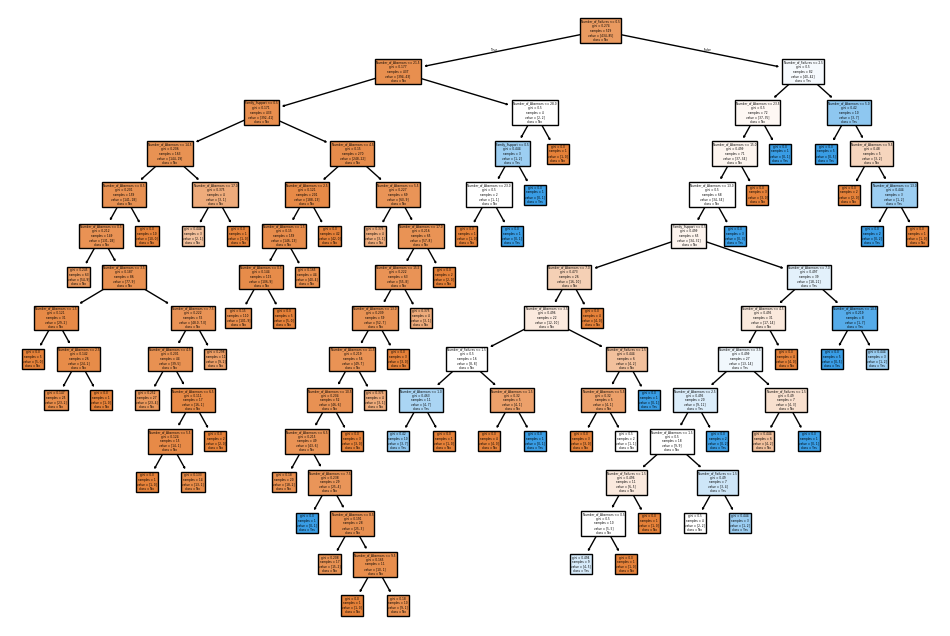

Feature: Family_Support, Importance: 0.023792177833518394
Feature: Number_of_Failures, Importance: 0.5063593792127016
Feature: Number_of_Absences, Importance: 0.46984844295378003


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("student_dropout.csv")

# Check column names to make sure the expected columns exist
print("Columns in dataset:", df.columns)

# After printing the columns, you can check the correct column name for 'Number_of_Absences' and replace it below.
# Assuming 'Absence_count' is the correct column name (change it based on your actual dataset)
required_columns = ['Family_Support', 'Number_of_Failures', 'Number_of_Absences']  # Replace 'Absence_count' with the correct name

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns: {missing_columns}")
else:
    # Select the features and the target variable
    X = df[required_columns]
    Y = df['Dropped_Out']

    # Converting the categorical target variable into numeric (0 = No, 1 = Yes)
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(Y)

    # Converting the 'Family_Support' column to numeric if it is categorical
    if X['Family_Support'].dtype == 'object':  # Check if Family_Support is categorical
        X['Family_Support'] = label_encoder.fit_transform(X['Family_Support'])

    # Split data into training and test sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Initialize and train the DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Predicting on the training set
    train_pred = clf.predict(X_train)

    # Predicting on the test set
    test_pred = clf.predict(X_test)

    # Calculate accuracy on training data
    train_accuracy = accuracy_score(y_train, train_pred)
    print(f"Training Accuracy: {train_accuracy}")

    # Calculate accuracy on test data
    test_accuracy = accuracy_score(y_test, test_pred)
    print(f"Testing Accuracy: {test_accuracy}")

    # Plotting the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
    plt.show()

    # Displaying feature importances for the decision tree model
    importance_scores = clf.feature_importances_
    for feature, importance in zip(X.columns, importance_scores):
        print(f"Feature: {feature}, Importance: {importance}")



Missing values per column:
School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absenc

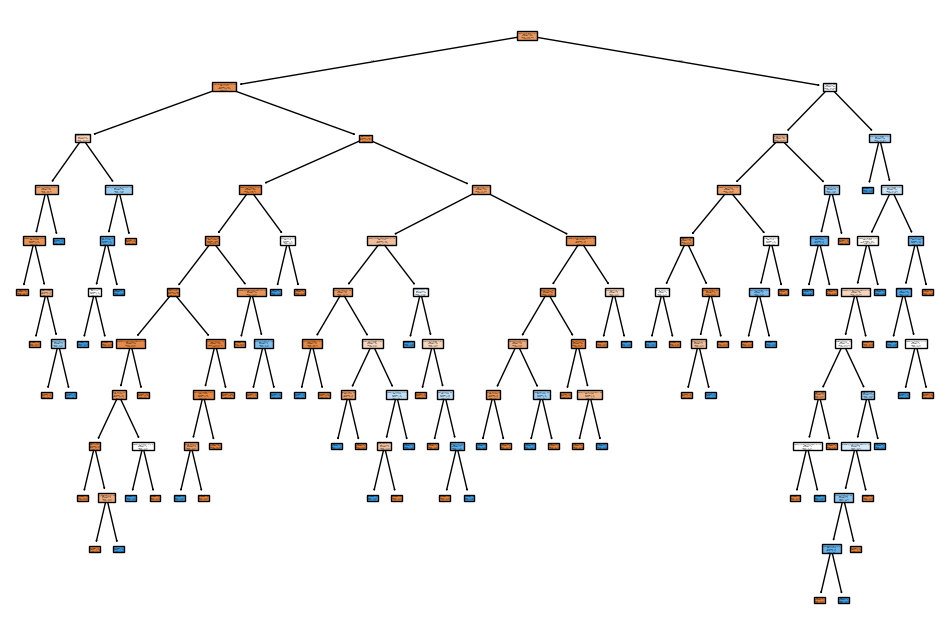


Most Influential Features (sorted by importance):
                        Feature  Importance
14           Number_of_Failures    0.183791
23          Family_Relationship    0.077650
29           Number_of_Absences    0.075467
4                   Family_Size    0.061056
0                        School    0.056978
7              Father_Education    0.049644
25                    Going_Out    0.045602
26  Weekend_Alcohol_Consumption    0.044299
27  Weekday_Alcohol_Consumption    0.042638
28                Health_Status    0.041032
20       Wants_Higher_Education    0.039126
9                    Father_Job    0.032335
6              Mother_Education    0.029734
8                    Mother_Job    0.027019
10   Reason_for_Choosing_School    0.025011
12                  Travel_Time    0.021622
3                       Address    0.021583
13                   Study_Time    0.020911
24                    Free_Time    0.020349
18  Extra_Curricular_Activities    0.020098
22              In_Relati

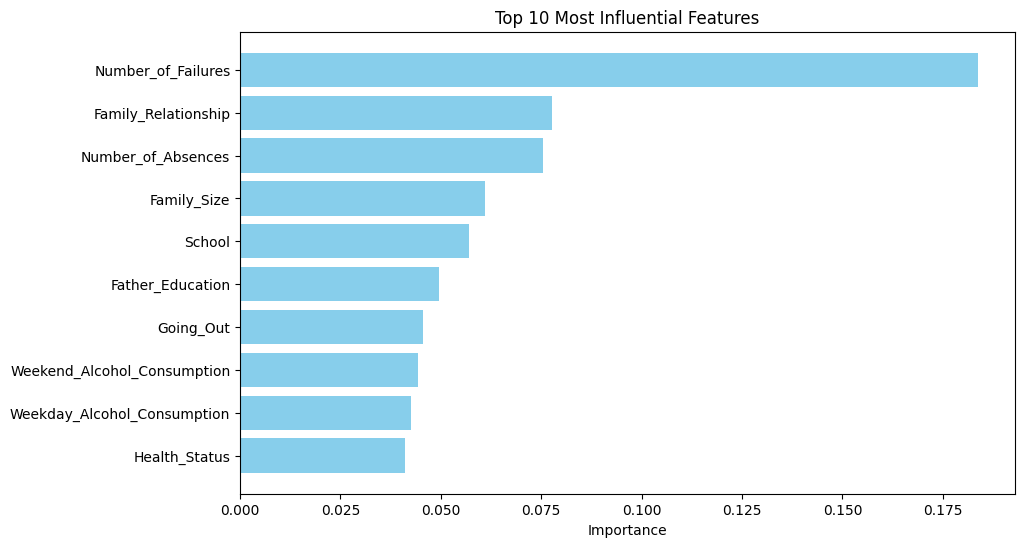

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("student_dropout.csv")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values (e.g., drop rows with missing values)
df = df.dropna()  # You can also use df.fillna() to impute if you prefer

# Encode categorical variables (assuming there are categorical columns to encode)
label_encoder = LabelEncoder()

# Apply label encoding to all object type columns (categorical variables)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Select features (0 to 31) and target (column 33)
X = df.iloc[:, 0:30]  # Features (first 32 columns)
Y = df.iloc[:, 33]    # Target variable (column 33)

# Convert the target variable (Y) from categorical values like 'Yes' and 'No' to numeric values (0 and 1)
label_encoder_target = LabelEncoder()
Y = label_encoder_target.fit_transform(Y)  # Convert 'Yes' -> 1, 'No' -> 0

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf4 = DecisionTreeClassifier(random_state=42)
clf4.fit(X_train, y_train)

# Predict on test data and calculate accuracy
pred4 = clf4.predict(X_test)
accuracy4 = accuracy_score(y_test, pred4)
print(f"Accuracy4: {accuracy4}")

# Plot the decision tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(clf4, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()

# Get feature importances
importance_scores = clf4.feature_importances_

# Create a DataFrame for easier sorting and viewing
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most influential features
print("\nMost Influential Features (sorted by importance):")
print(importance_df)

# Optionally: Visualize the top N most important features
top_n = 10  # Change this number to visualize more or fewer features
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Most Influential Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()